# Medical Diagnosis

In [1]:
import pandas as pd

In [2]:
medical_df = pd.read_csv("insurance.csv")

In [3]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
medical_df.shape

(1338, 7)

# Exploratory Data Analysis

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df,
                  x='age',
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

### Body Mass Index

In [11]:
fig = px.histogram(medical_df,
                  x = 'bmi',
                  marginal = 'box',
                  title = 'Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

In [12]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'smoker',
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'region',
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'sex',
                  title = 'Anual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker 

In [15]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
px.histogram(medical_df, x='smoker', color = 'sex', title='Smoker')

In [17]:
px.histogram(medical_df, x='sex', color='sex', title='Distribution of Sex')

In [18]:
px.histogram(medical_df, x='region', color = 'region', title='Smoker')

In [19]:
px.histogram(medical_df, x='children', color = 'children', title='No of Children')

### Age and Charges

In [20]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity = 0.8,
                hover_data=['sex'],
                title='Age Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges 

In [21]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                opacity=0.8,
                color='smoker',
                hover_data=['sex'],
                title='BMI VS Charges')
fig.update_traces(marker_size=5)
fig.show()

### Children And Charges

In [22]:
fig = px.violin(medical_df,
               x='children',
               y='charges',
               title='No of Children and Charges')
fig.update_traces(marker_size=5)
fig.show()

### Sex and Charges

In [23]:
fig = px.violin(medical_df,
                x='sex',
                y='charges',
                color='smoker',
                hover_data=['children'],
                title='Sex and Charges')
fig.update_traces(marker_size=5)
fig.show()

### Region And Charges 

In [24]:
fig = px.violin(medical_df,
               x='region',
               y='charges',
               color = 'sex',
               title='Region and Charges')
fig.update_traces(marker_size=5)
fig.show()

### Correlation 

In [25]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

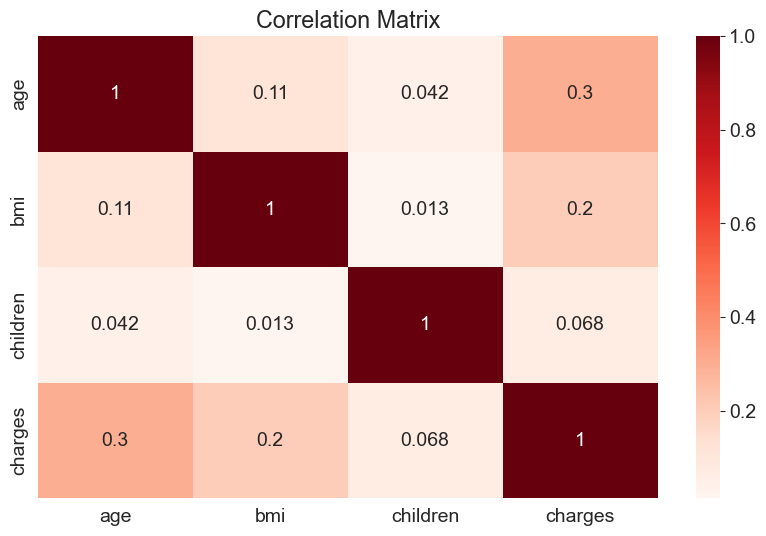

In [26]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

### Linear Regression using a Single Feature

In [27]:
non_smokers_df = medical_df[medical_df.smoker == 'no']

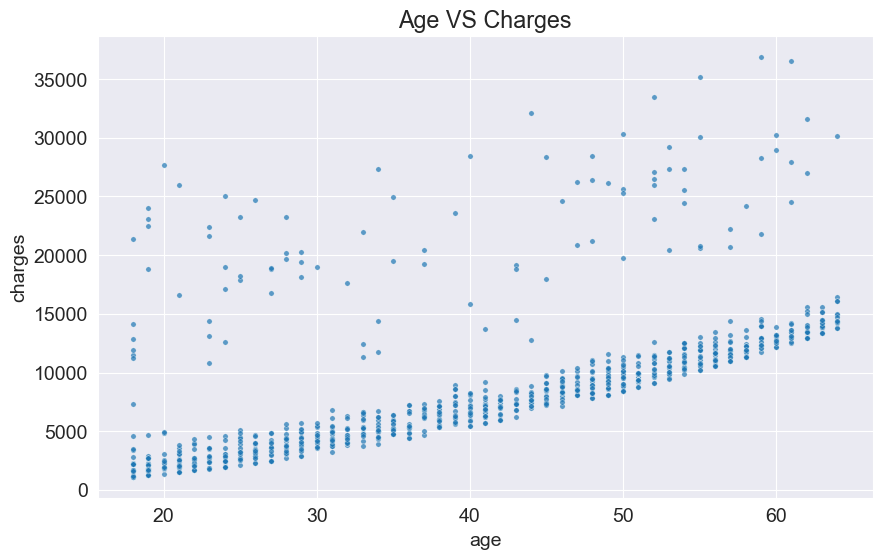

In [28]:
plt.title("Age VS Charges")
sns.scatterplot(data = non_smokers_df, x='age', y='charges', alpha=0.7, s=15);

### Model

##### Prediction of Charges based on Age

In [29]:
def estimate_charges(age, w, b):
    return w*age + b

In [30]:
w=100
b=-1000

In [31]:
ages = non_smokers_df.age
estimated_charges = estimate_charges(ages, w, b)

In [32]:
estimated_charges

1        800
2       1800
3       2300
4       2200
5       2100
        ... 
1332    4200
1333    4000
1334     800
1335     800
1336    1100
Name: age, Length: 1064, dtype: int64

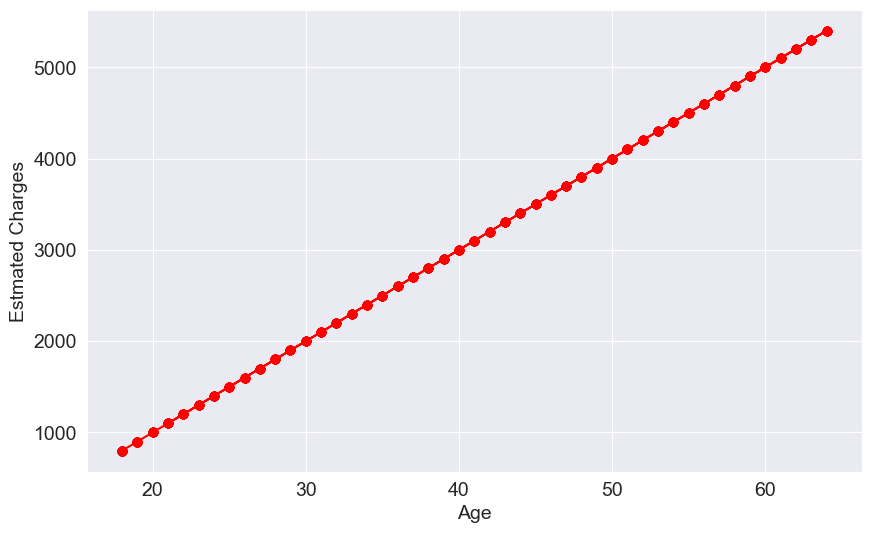

In [33]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel("Age")
plt.ylabel("Estmated Charges");

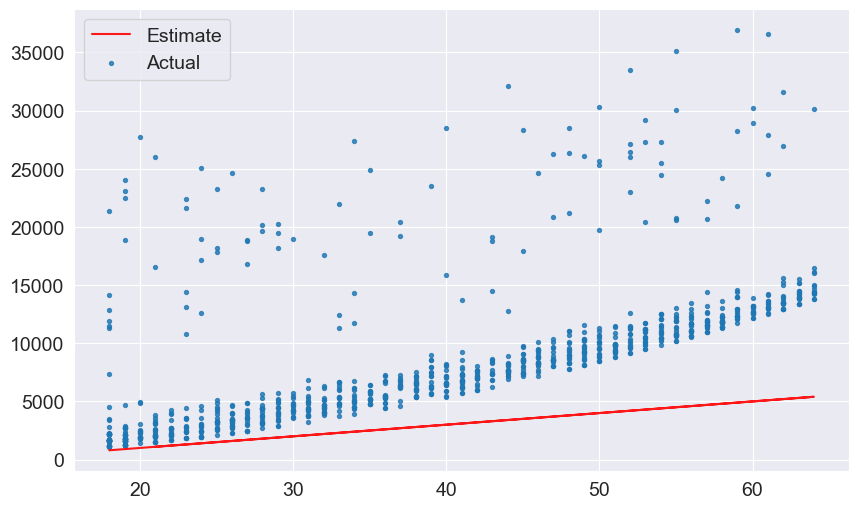

In [40]:
target = non_smokers_df.charges
plt.plot(ages, estimated_charges,'r',alpha =0.9)
plt.scatter(ages, target, s=8, alpha= 0.8)
plt.xlabel='Age'
plt.ylabel='Charges'
plt.legend(['Estimate','Actual'])

In [41]:
def try_params(w,b):
    ages = non_smokers_df.age
    target = non_smokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha =0.8)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(['Estimate', 'Actual'])

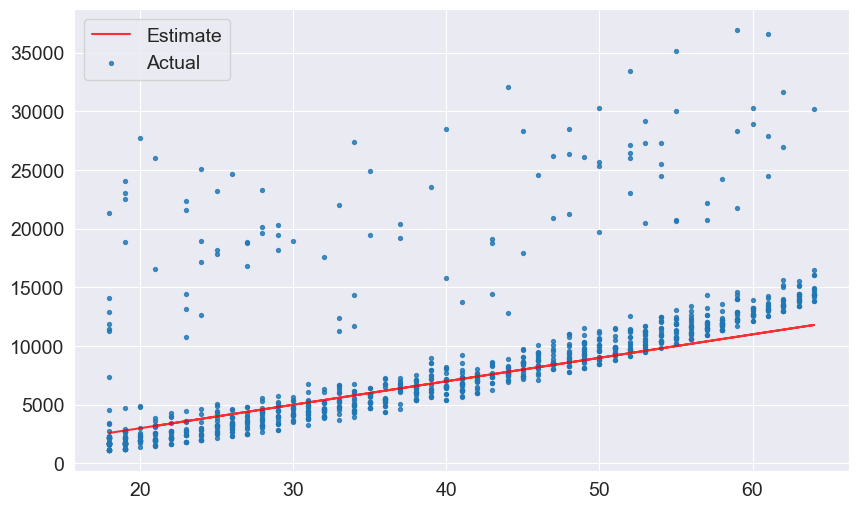

In [42]:
try_params(200,-1000)

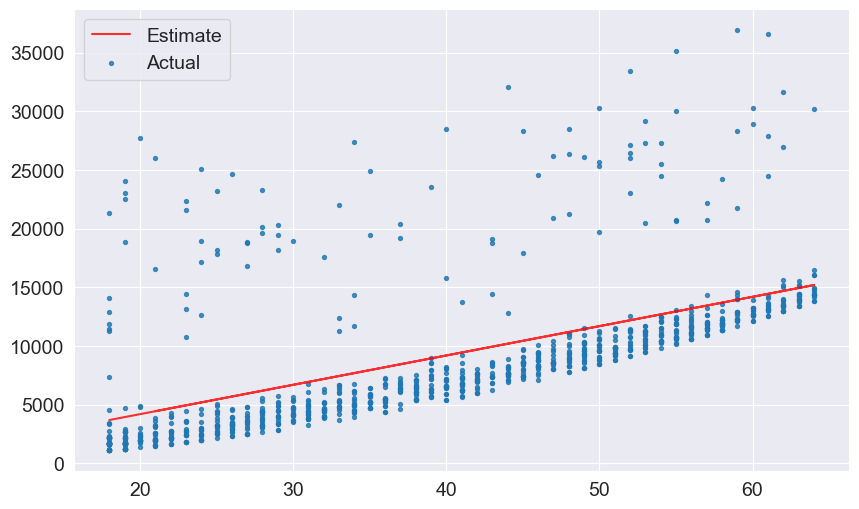

In [43]:
try_params(250,-800)

### Loss/Cost Function 

In [44]:
import numpy as np

In [45]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [46]:
w=250
b=-800

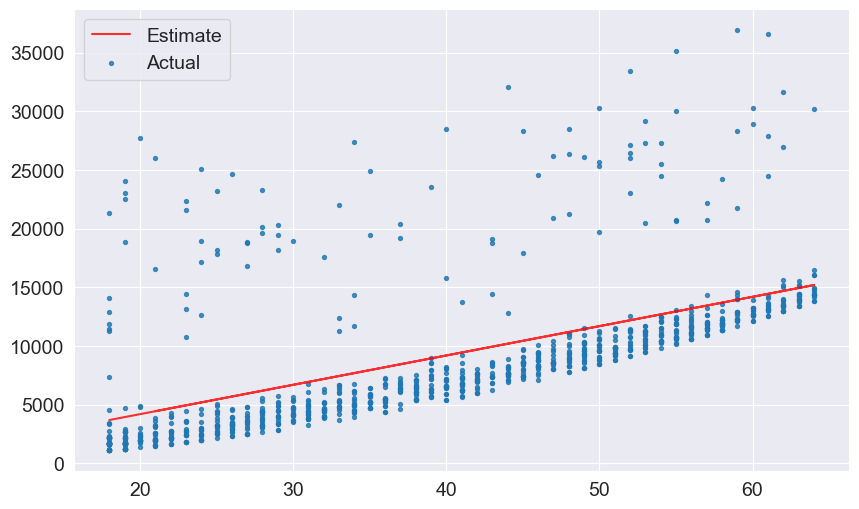

In [47]:
try_params(w,b)

In [48]:
targets = non_smokers_df.charges
predictions = estimate_charges(non_smokers_df.age, w, b)

In [49]:
rmse(targets, predictions)

4708.77282695621

In [50]:
def try_params(w, b):
    ages = non_smokers_df.age
    target = non_smokers_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha =0.8)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(["Prediction", "Actual"]);
    
    loss = rmse(target, predictions)
    print("RMSE Loss:", loss)

RMSE Loss: 4668.876022697689


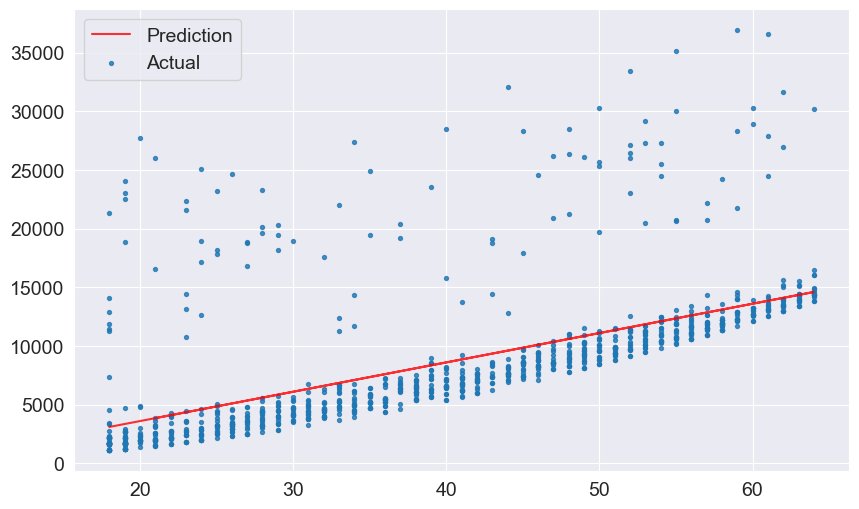

In [51]:
try_params(250, -1390)

### Optimizer

#### Linear Regression and Scikit-learn 

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [55]:
inputs = non_smokers_df[['age']]
targets = non_smokers_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [56]:
model.fit(inputs, targets)

LinearRegression()

In [57]:
model.predict(np.array([[23],
              [37],
              [61]]))

C:\Users\ABBASI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [58]:
predictions = model.predict(inputs)

In [59]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [60]:
rmse(targets, predictions)

4662.505766636391

In [61]:
#w
model.coef_

array([267.24891283])

In [62]:
#b
model.intercept_

-2091.4205565650827

RMSE Loss: 4662.505766636391


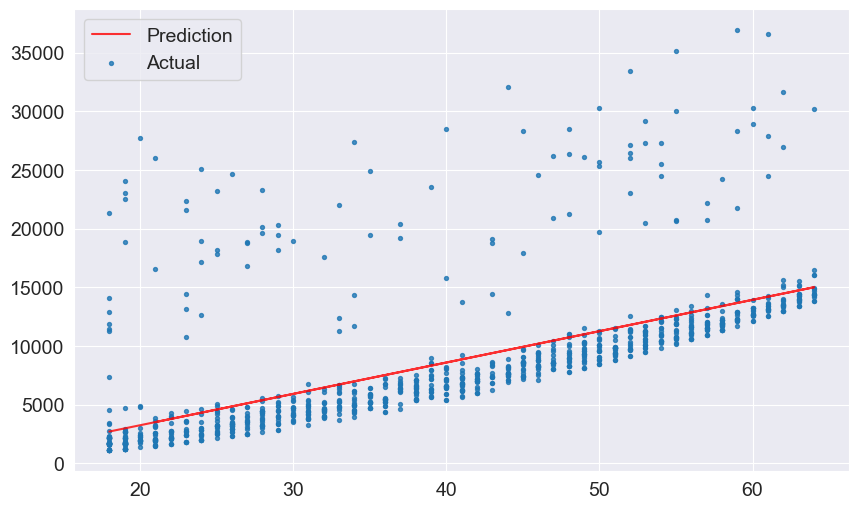

In [63]:
try_params(model.coef_, model.intercept_)

In [64]:
from sklearn.linear_model import SGDRegressor

In [65]:
model_1= SGDRegressor()

In [66]:
model_1.fit(inputs,targets)

SGDRegressor()

In [67]:
model_1.predict(np.array([[23],
              [37],
              [61]]))

C:\Users\ABBASI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 1726.67463792,  5409.51899424, 11722.96646222])

In [68]:
predictions = model_1.predict(inputs)

In [69]:
rmse(targets,predictions)

5243.0238449095095

In [70]:
model_1.coef_

array([263.06031117])

In [71]:
model_1.intercept_

array([-4323.7125189])

RMSE Loss: 5243.0238449095095


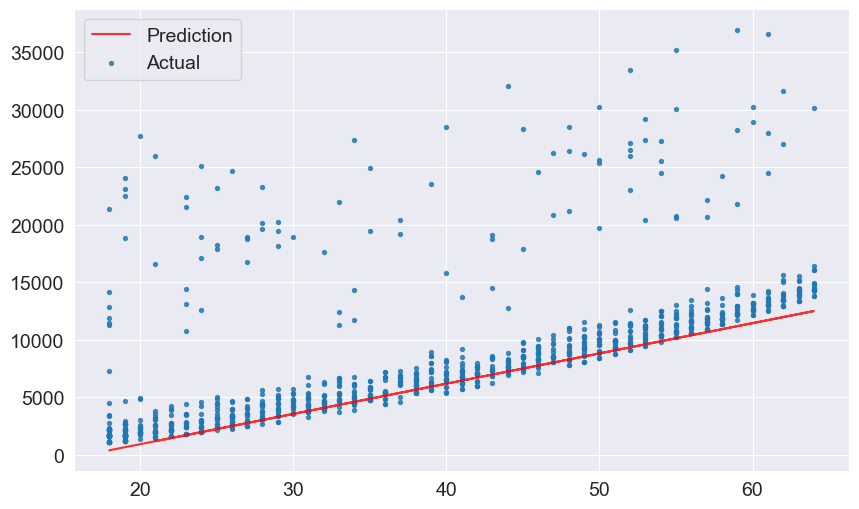

In [72]:
try_params(model_1.coef_, model_1.intercept_)

In [73]:
smokers_df = medical_df[medical_df.smoker == 'yes']

In [74]:
smokers_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

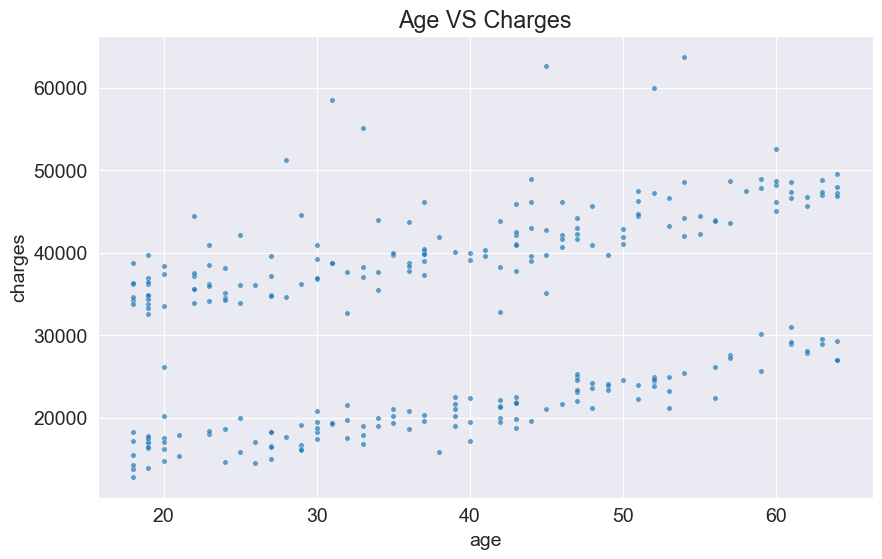

In [75]:
plt.title('Age VS Charges')
sns.scatterplot(data = smokers_df, x = 'age', y='charges', alpha=0.7, s=15);

In [76]:
w = 800
b = 1600

In [77]:
ages = smokers_df.age
estimated_charges  = estimate_charges(ages, w, b)

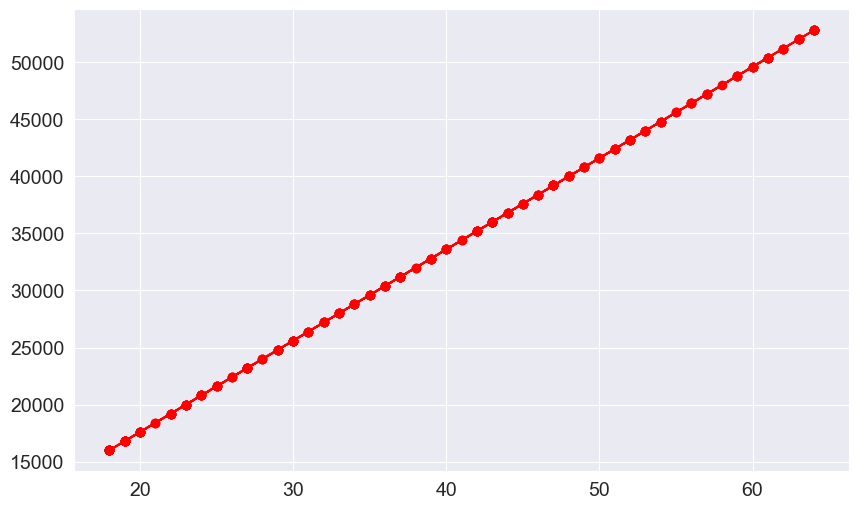

In [79]:
plt.plot(ages, estimated_charges, 'r-o');

TypeError: 'str' object is not callable

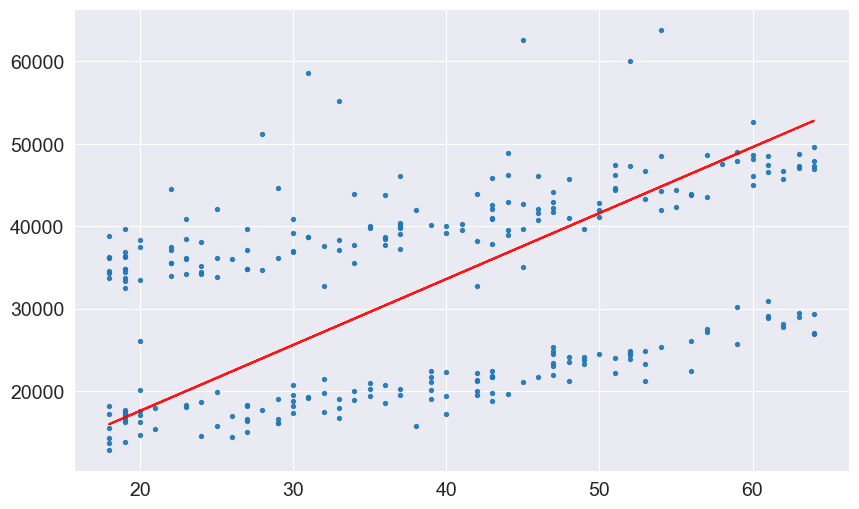

In [80]:
target = smokers_df.charges

plt.plot(ages, estimated_charges,'r',alpha = 0.9)
plt.scatter(ages, target, s=8,alpha=0.9)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legent(['Estimate', 'Actual'])

In [81]:
def try_params(w,b):
    ages = smokers_df.age
    target= smokers_df.charges
    
    estimated_charges = estimate_charges(ages, w, b);
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.8)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

TypeError: 'str' object is not callable

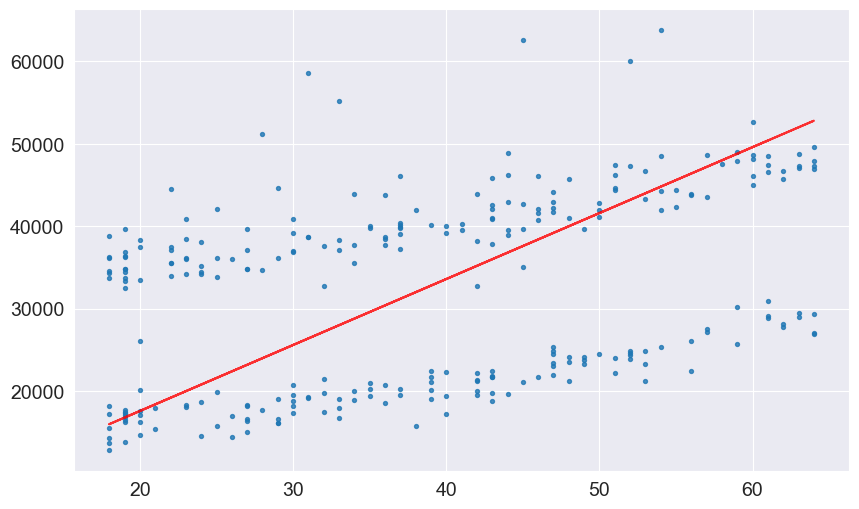

In [82]:
try_params(800, 1600)

In [83]:
target = smokers_df['charges']
predicted = estimate_charges(smokers_df.age,w,b)

In [84]:
rmse(target,predicted)

12733.2951032873

In [85]:
def try_params(w, b):
    ages = smokers_df.age;
    target = smokers_df.charges;
    predictions = estimate_charges(ages, w, b)
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.legend(['Predicted', 'Actual'])

RMSE Loss:  12733.2951032873


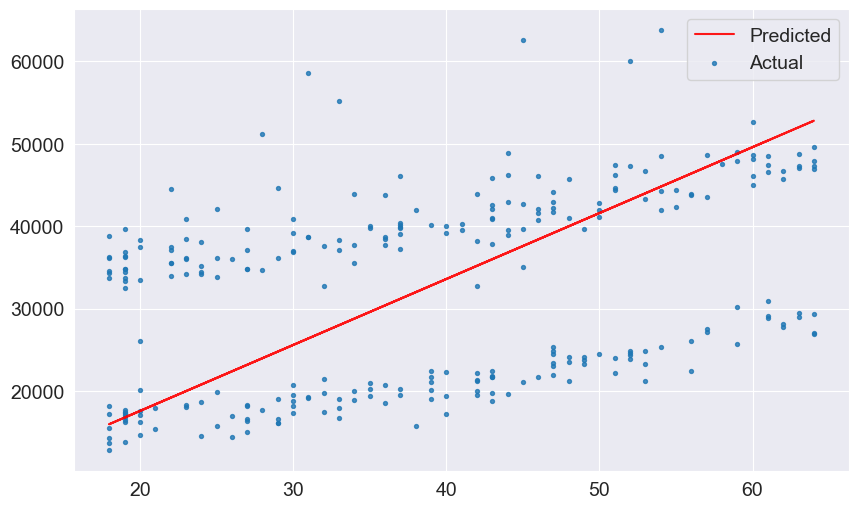

In [86]:
try_params(800, 1600)

In [87]:
inputs = smokers_df[['age']]
targets = smokers_df.charges

In [88]:
model.fit(inputs, targets)

LinearRegression()

In [89]:
predictions = model.predict(inputs)

In [90]:
rmse(targets, predictions)

10711.00334810241

In [91]:
x = model.coef_

In [92]:
y = model.intercept_

RMSE Loss:  10711.00334810241


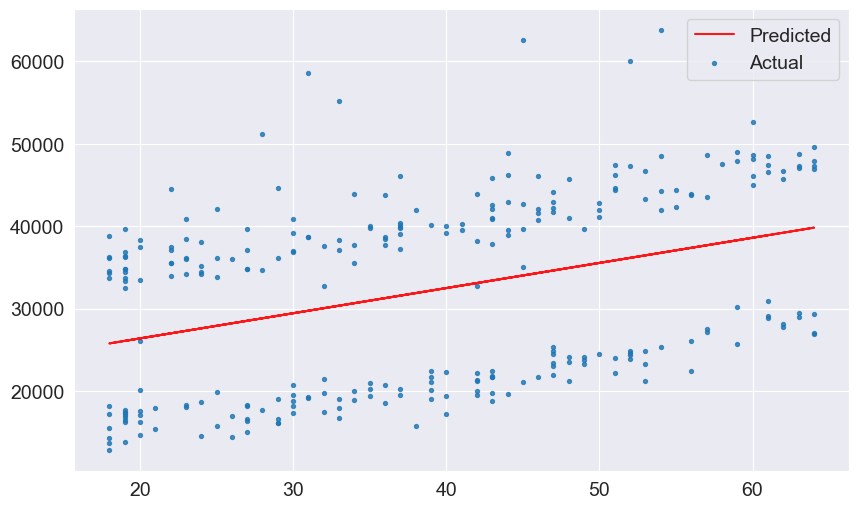

In [93]:
try_params(x, y)

In [94]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# COmpute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636391


### Linear Regression using multiple features

In [95]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# COmpute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.312835461298


In [97]:
non_smokers_df.charges.corr(non_smokers_df.bmi)

0.08403654312833272

In [100]:
fig = px.scatter(non_smokers_df, x='bmi', y= 'charges', title='BMI VS Charges')
fig.update_traces(marker_size=5)
fig.show()

In [102]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

#### Include the feature of children

In [103]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi', 'children']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# COmpute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038245


#### For Smokers

In [104]:
# Create inputs and targets
inputs, targets = smokers_df[['age', 'bmi', 'children']], smokers_df['charges']

# Create and train the model
model_1 = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model_1.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5718.2024805241535


#### For All

In [105]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.31790112597


### Using Categorical Features

#### Binary Categories

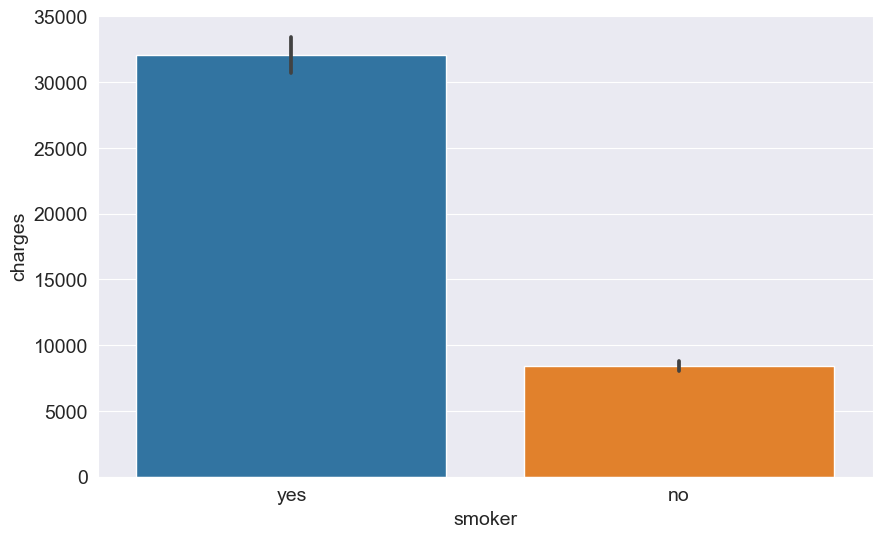

In [107]:
sns.barplot(data = medical_df, x='smoker', y='charges');

In [108]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [109]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [110]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [111]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188078


<AxesSubplot:xlabel='sex', ylabel='charges'>

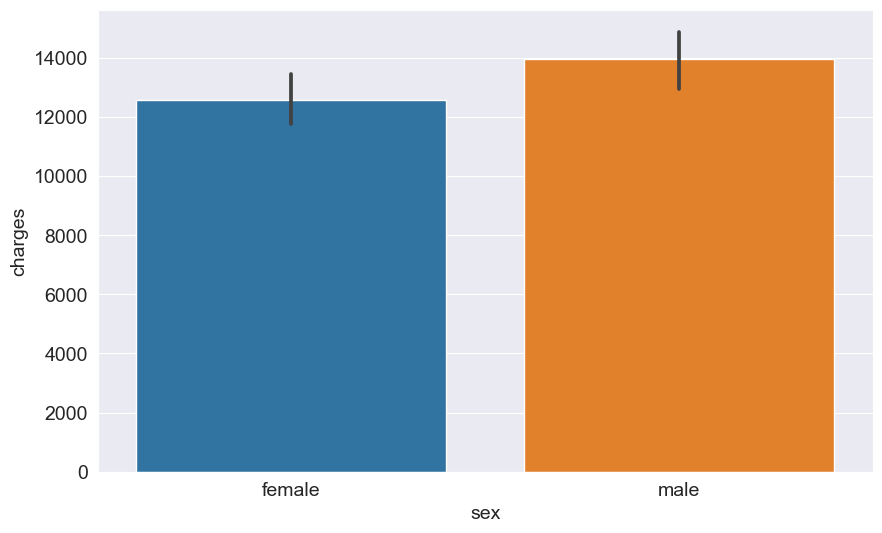

In [112]:
sns.barplot(data = medical_df, x='sex', y='charges')

In [116]:
sex_codes = {'female': 0, 'male': 1}

In [117]:
medical_df['sex_code']= medical_df.sex.map(sex_codes)

In [120]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.1007087545395


### One-hot Encoding for Regions

<AxesSubplot:xlabel='region', ylabel='charges'>

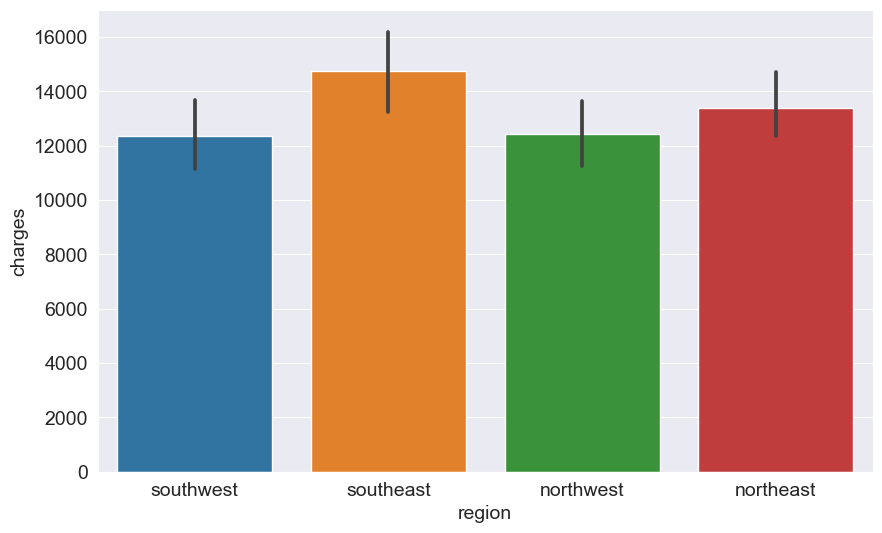

In [121]:
sns.barplot(data=medical_df, x='region', y='charges')

In [122]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [123]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [125]:
medical_df[['northeast','northwest', 'southeast','southwest']] = one_hot

In [126]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [142]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174455


In [130]:
non_smokers_df = medical_df[medical_df.smoker == 'no']

In [131]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi', 'children','sex_code','northeast','northwest','southeast','southwest']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4573.074988795491


In [132]:
smokers_df = medical_df[medical_df.smoker == 'yes']

In [133]:
# Create inputs and targets
inputs, targets = smokers_df[['age', 'bmi', 'children','sex_code','northeast','northwest','southeast','southwest']], smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute the Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5668.467882112154


In [135]:
model

LinearRegression()

In [137]:
medical_df.loc[10]

age                   25
sex                 male
bmi                26.22
children               0
smoker                no
region         northeast
charges        2721.3208
smoker_code            0
sex_code               1
northeast            1.0
northwest            0.0
southeast            0.0
southwest            0.0
Name: 10, dtype: object

In [144]:
model.predict([[28,29,2,1,1,0,0,1,0]])

C:\Users\ABBASI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([28723.24867302])

### Creating a Test Set

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.1)

In [150]:
# Create and train the model
model = LinearRegression().fit(input_train, target_train)

# Generate predictions
predictions_test = model.predict(input_test)

# Compute loss to evalute the model
loss = rmse(target_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5464.478937797445


In [152]:
# Generate predictions
predictions_train = model.predict(input_train)

# Compute loss to evalute the model
loss = rmse(target_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6106.389968040792
